In [ ]:
!pip install pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = pyo.ConcreteModel()

In [ ]:
# Decision Variables

model.A = pyo.Var(domain = pyo.NonNegativeReals)
model.B = pyo.Var(domain = pyo.NonNegativeReals)
model.X1 = pyo.Var(domain = pyo.NonNegativeReals)
model.X2 = pyo.Var(domain = pyo.NonNegativeReals)
model.X3 = pyo.Var(domain = pyo.NonNegativeReals)
model.Y1 = pyo.Var(domain = pyo.NonNegativeReals)
model.Y2 = pyo.Var(domain = pyo.NonNegativeReals)
model.Y3 = pyo.Var(domain = pyo.NonNegativeReals)

In [ ]:
# Objective Rule

model.Obj = pyo.Objective(expr = 2*(model.A+model.B), sense = pyo.minimize)

In [ ]:
#value(model.A)

In [ ]:
#pyo.value(model.A)

In [ ]:
model.A.pprint()

A : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  None :  None : False :  True : NonNegativeReals


In [ ]:
# Constraints
# linear constraints
model.Const1 = pyo.Constraint(expr = model.X1 >= 6)
model.Const2 = pyo.Constraint(expr = model.Y1 >= 6)
model.Const3 = pyo.Constraint(expr = model.X2 >= 12)
model.Const4 = pyo.Constraint(expr = model.Y2 >= 12)
model.Const5 = pyo.Constraint(expr = model.X3 >= 16)
model.Const6 = pyo.Constraint(expr = model.Y3 >= 16)
model.Const7 = pyo.Constraint(expr = model.X1-model.B <= -6)
model.Const8 = pyo.Constraint(expr = model.Y1-model.A <= -6)
model.Const9 = pyo.Constraint(expr = model.X2-model.B <= -12)
model.Const10 = pyo.Constraint(expr = model.Y2-model.A <= -12)
model.Const11 = pyo.Constraint(expr = model.X3-model.B <= -16)
model.Const12 = pyo.Constraint(expr = model.Y3-model.A <= -16)
# non-linear constraints
model.Const13 = pyo.Constraint(expr = (model.X1-model.X2)**2+(model.Y1-model.Y2)**2>=324)
model.Const14 = pyo.Constraint(expr = (model.X1-model.X3)**2+(model.Y1-model.Y3)**2>=484)
model.Const15 = pyo.Constraint(expr = (model.X2-model.X3)**2+(model.Y2-model.Y3)**2>=784)


In [ ]:
from sys import executable
# Solver
solver = pyo.SolverFactory("ipopt", executable = '/content/ipopt', tee = True)
results = solver.solve(model, tee=True)

Ipopt 3.12.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:        8
                     variables with only lower bounds:        8
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Tot

In [ ]:
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 15
  Number of variables: 8
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.09682726860046387
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
print("Objective Function = ",model.Obj())
print("X1----->",model.X1())
print("Y1----->",model.Y1())
print("X2----->",model.X2())
print("Y2----->",model.Y2())
print("X3----->",model.X3())
print("Y3----->",model.Y3())
print("A----->",model.A())
print("B----->",model.B())

Objective Function =  180.17805823980603
X1-----> 5.999999944765629
Y1-----> 5.999999941685595
X2-----> 11.999999881699345
Y2-----> 22.970562618686483
X3-----> 39.118466778711046
Y3-----> 15.999999844876506
A-----> 34.97056249993909
B-----> 55.11846661996393


In [ ]:
model.pprint()

8 Var Declarations
    A : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 34.97056249993909 :  None : False : False : NonNegativeReals
    B : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 55.11846661996393 :  None : False : False : NonNegativeReals
    X1 : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 5.999999944765629 :  None : False : False : NonNegativeReals
    X2 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 11.999999881699345 :  None : False : False : NonNegativeReals
    X3 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 39.118466778711046 :  None : False : False : NonNegativeReals
    Y1 : Size=1, Index=None
        Key  : Lower 

Minimizing perimeter of rectangle, 
Keeping all circles inside rectangle, 
no circles overlapping


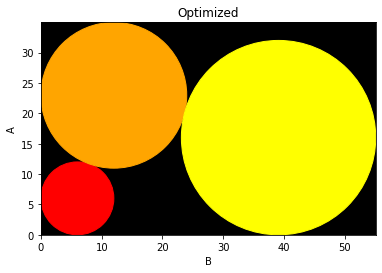

In [ ]:
print("Minimizing perimeter of rectangle, \nKeeping all circles inside rectangle, \nno circles overlapping")
from textwrap import fill
from matplotlib import pyplot as plt, patches
from matplotlib.patches import Rectangle, Circle
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
circle1 = patches.Circle(xy=( model.X1() , model.Y1() ), radius=6 , color='red')
circle2 = patches.Circle(xy=( model.X2() , model.Y2() ), radius=12 , color='orange')
circle3 = patches.Circle(xy=( model.X3() , model.Y3() ), radius=16 , color='yellow')
rect = patches.Rectangle(xy=(0, 0), width=model.B(), height=model.A(), color="black")
ax.add_patch(rect)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
plt.xlabel("B")
plt.ylabel("A")
plt.title("Optimized")
plt.xlim([0,model.B()])
plt.ylim([0,model.A()])
ax.set_aspect(1) #equal measure on axis
plt.show()